## Stage 1: Data Acquisition & Preparation
### Owner: Valencya
### Goal: Cleaning data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
url = 'https://raw.githubusercontent.com/valencya07/Final-Project/refs/heads/main/recruitment_efficiency_improved.csv'

df = pd.read_csv(url)

In [ ]:
df

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate
0,1,Engineering,Software Engineer,280,24,1400.38,Referral,0.98
1,2,Sales,Account Executive,262,7,2730.45,LinkedIn,0.84
2,3,Product,UX Designer,11,76,5286.12,LinkedIn,0.83
3,4,Engineering,DevOps Engineer,238,26,5255.78,Recruiter,0.49
4,5,HR,Talent Acquisition,275,37,4987.03,LinkedIn,0.79
...,...,...,...,...,...,...,...,...
4995,4996,Engineering,Software Engineer,156,51,958.00,Job Portal,0.32
4996,4997,Sales,Sales Representative,118,35,4480.88,Job Portal,0.80
4997,4998,Sales,Business Development Manager,220,65,1882.45,Job Portal,1.00
4998,4999,Sales,Sales Associate,63,88,7245.96,LinkedIn,0.80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   recruitment_id         5000 non-null   int64  
 1   department             5000 non-null   object 
 2   job_title              5000 non-null   object 
 3   num_applicants         5000 non-null   int64  
 4   time_to_hire_days      5000 non-null   int64  
 5   cost_per_hire          5000 non-null   float64
 6   source                 5000 non-null   object 
 7   offer_acceptance_rate  5000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 312.6+ KB


In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

counts = {
    'Numerical': len(numerical_cols),
    'Categorical': len(categorical_cols)
}


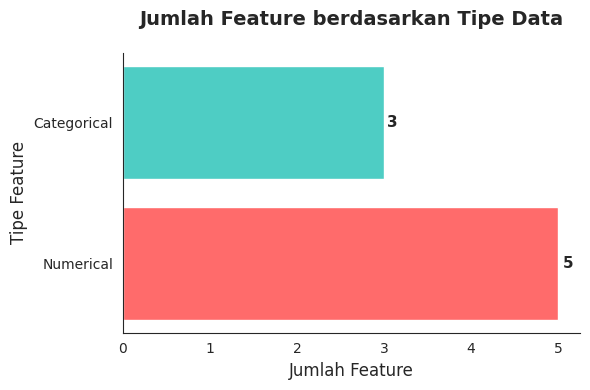

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-muted')

plt.figure(figsize=(6, 4))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

bars = plt.barh(list(counts.keys()), list(counts.values()), color=colors[:len(counts)])

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (width * 0.01), # Kasih gap dikit biar gak nempel garis
        bar.get_y() + bar.get_height() / 2,
        f'{int(width)}',
        ha='left',
        va='center',
        fontsize=11,
        fontweight='bold'
    )

plt.title('Jumlah Feature berdasarkan Tipe Data', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Jumlah Feature', fontsize=12)
plt.ylabel('Tipe Feature', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.duplicated(subset='recruitment_id').sum()

np.int64(0)

In [ ]:
(df[['num_applicants', 'time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']] == 0).sum()

,0
num_applicants,0
time_to_hire_days,0
cost_per_hire,0
offer_acceptance_rate,0


In [ ]:
df[['department', 'job_title', 'source']].isin(['', ' ', 'unknown', 'Unknown', 'N/A']).sum()

,0
department,0
job_title,0
source,0


In [ ]:
df['source'].value_counts()

,count
source,
LinkedIn,1291
Referral,1279
Recruiter,1221
Job Portal,1209


### Temuan data
#### Berdasarkan hasil pemeriksaan struktur dan isi dataset, dapat disimpulkan bahwa data berada dalam kondisi sangat baik dan konsisten. Tidak ditemukan data duplikat baik secara keseluruhan baris maupun pada kolom identitas rekrutmen. Seluruh kolom numerik dan kategorikal terisi lengkap tanpa adanya nilai kosong, nilai nol yang tidak wajar, maupun penanda data tidak tersedia.

#### Selain itu, kolom kategorikal seperti departemen, jabatan, dan sumber rekrutmen memiliki nilai yang terdefinisi dengan jelas dan konsisten, tanpa ditemukannya kategori ambigu seperti nilai kosong atau kategori umum yang tidak spesifik. Hal ini menunjukkan bahwa data telah melalui proses validasi atau pembersihan sebelumnya.

#### Distribusi sumber rekrutmen juga menunjukkan proporsi yang relatif seimbang antar kanal, sehingga dataset ini sangat sesuai digunakan untuk analisis perbandingan efisiensi proses rekrutmen antar sumber, departemen, maupun jabatan.

#### Dengan kondisi data yang bersih dan stabil, analisis dapat langsung difokuskan pada penggalian insight bisnis dan evaluasi strategi rekrutmen tanpa memerlukan proses pembersihan data lanjutan.

In [ ]:
df[['num_applicants', 'time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']].describe()

,num_applicants,time_to_hire_days,cost_per_hire,offer_acceptance_rate
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,155.621000,47.191400,5214.826236,0.650832
std,84.164264,23.864934,2730.999185,0.202052
min,10.000000,7.000000,507.160000,0.300000
25%,83.000000,26.000000,2820.597500,0.480000
50%,157.000000,47.000000,5218.290000,0.650000
75%,229.000000,67.000000,7611.412500,0.830000
max,299.000000,89.000000,9998.910000,1.000000


In [ ]:
df['job_title'].unique()

array(['Software Engineer', 'Account Executive', 'UX Designer',
       'DevOps Engineer', 'Talent Acquisition', 'Marketing Specialist',
       'Accountant', 'HR Coordinator', 'Recruitment Specialist',
       'Business Development Manager', 'Sales Associate',
       'Backend Developer', 'Finance Manager', 'Product Manager',
       'Social Media Manager', 'Content Strategist', 'SEO Analyst',
       'Financial Analyst', 'Sales Representative', 'UI Designer',
       'Product Analyst', 'Data Engineer', 'Payroll Specialist',
       'HR Manager'], dtype=object)

In [ ]:
df['department'].unique()

array(['Engineering', 'Sales', 'Product', 'HR', 'Marketing', 'Finance'],
      dtype=object)

In [ ]:
df[['department','job_title','source']].mode()

,department,job_title,source
0,HR,HR Coordinator,LinkedIn


In [ ]:
df['offer_acceptance_rate'].unique()

array([0.98, 0.84, 0.83, 0.49, 0.79, 0.82, 0.89, 0.56, 0.6 , 0.95, 0.57,
       0.61, 0.34, 0.54, 0.39, 0.63, 0.48, 0.51, 0.94, 0.69, 0.37, 0.52,
       0.72, 0.4 , 0.71, 0.41, 0.65, 0.59, 0.58, 0.73, 0.87, 0.53, 0.43,
       0.31, 0.3 , 0.99, 0.77, 0.68, 0.44, 0.96, 0.5 , 0.85, 1.  , 0.81,
       0.33, 0.74, 0.62, 0.92, 0.42, 0.78, 0.35, 0.86, 0.38, 0.7 , 0.93,
       0.46, 0.97, 0.76, 0.36, 0.32, 0.9 , 0.8 , 0.67, 0.66, 0.64, 0.55,
       0.75, 0.45, 0.88, 0.91, 0.47])

In [ ]:
# List kolom numerik yang bisa aja typo/spasi / string
numeric_cols = ['num_applicants', 'time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']

for col in numeric_cols:
    # 1. Convert ke string, strip spasi
    df[col] = df[col].astype(str).str.strip()
    # 2. Convert balik ke numeric (int/float otomatis sesuai isi)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Cek lagi ada yang ga bisa di-convert
for col in numeric_cols:
    non_numeric = df[df[col].isna()]
    print(f"{col} - jumlah non-numeric / error: {len(non_numeric)}")

num_applicants - jumlah non-numeric / error: 0
time_to_hire_days - jumlah non-numeric / error: 0
cost_per_hire - jumlah non-numeric / error: 0
offer_acceptance_rate - jumlah non-numeric / error: 0


In [ ]:
numeric_cols = ['num_applicants', 'time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']

In [ ]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} - Jumlah outliers: {len(outliers)}")

num_applicants - Jumlah outliers: 0
time_to_hire_days - Jumlah outliers: 0
cost_per_hire - Jumlah outliers: 0
offer_acceptance_rate - Jumlah outliers: 0


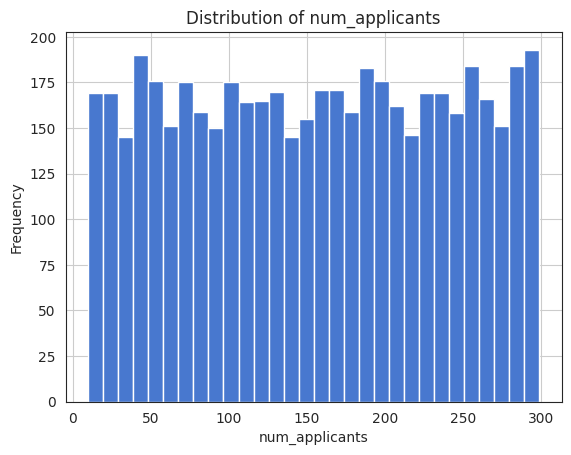

In [ ]:
df['num_applicants'].hist(bins=30)
plt.title('Distribution of num_applicants')
plt.xlabel('num_applicants')
plt.ylabel('Frequency')
plt.show()


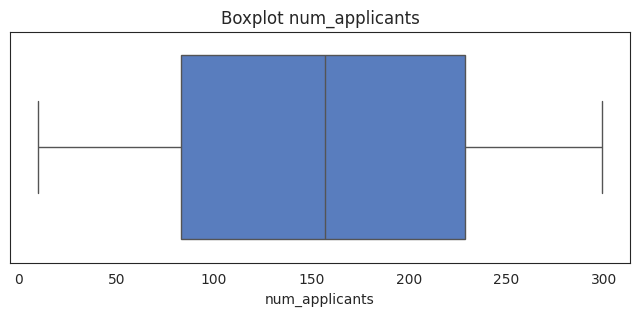

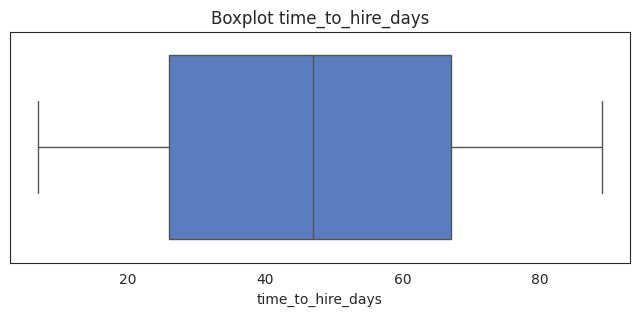

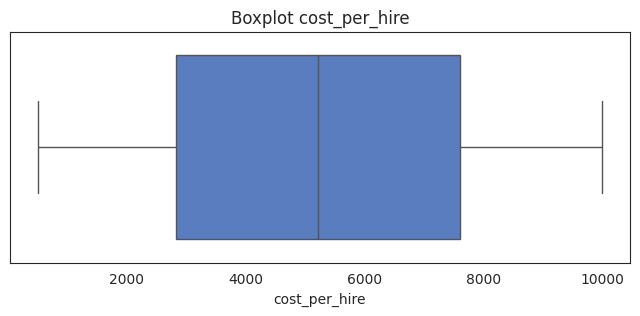

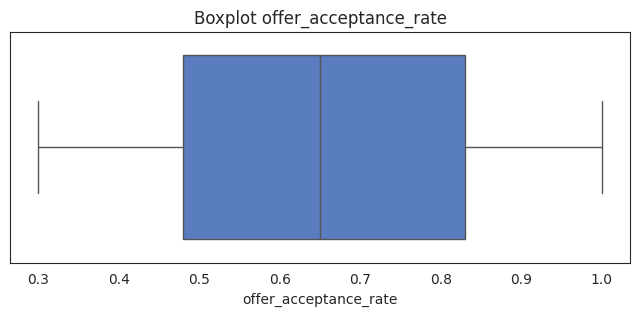

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()

### cleaning step dilakukan, dataset ternyata sudah bersih, tidak ada perubahan

In [ ]:
df.to_csv("recruitment_data_cleaned.csv", index=False)

## Stage 1: Data Acquisition & Preparation
### Owner:Valencya
### Contribution (EDA Insight & Markdown notes) : Elfa Anggelia
### Output: dataset_final.csv
### Goals:
#### Granular Analysis: Melakukan agregasi data pada level Job Title untuk menangkap anomali dan pola spesifik yang tidak terlihat pada level departemen.

#### Outlier Management: Mengidentifikasi dan menangani pencilan ekstrem (terutama pada Cost) menggunakan Robust Scaling agar tidak mendistorsi hasil pengelompokan (clustering).

#### Strategic Feature Engineering: Mengembangkan metrik komposit Efficiency Score (gabungan OAR, Time, dan Cost) sebagai indikator utama efektivitas rekrutmen.

#### Clustering Readiness: Memastikan seluruh fitur memiliki skala yang setara (Feature Alignment) guna optimalisasi perhitungan jarak pada algoritma K-Means.

In [ ]:
df

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate
0,1,Engineering,Software Engineer,280,24,1400.38,Referral,0.98
1,2,Sales,Account Executive,262,7,2730.45,LinkedIn,0.84
2,3,Product,UX Designer,11,76,5286.12,LinkedIn,0.83
3,4,Engineering,DevOps Engineer,238,26,5255.78,Recruiter,0.49
4,5,HR,Talent Acquisition,275,37,4987.03,LinkedIn,0.79
...,...,...,...,...,...,...,...,...
4995,4996,Engineering,Software Engineer,156,51,958.00,Job Portal,0.32
4996,4997,Sales,Sales Representative,118,35,4480.88,Job Portal,0.80
4997,4998,Sales,Business Development Manager,220,65,1882.45,Job Portal,1.00
4998,4999,Sales,Sales Associate,63,88,7245.96,LinkedIn,0.80


In [ ]:
df.describe()

,recruitment_id,num_applicants,time_to_hire_days,cost_per_hire,offer_acceptance_rate
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,155.621000,47.191400,5214.826236,0.650832
std,1443.520003,84.164264,23.864934,2730.999185,0.202052
min,1.000000,10.000000,7.000000,507.160000,0.300000
25%,1250.750000,83.000000,26.000000,2820.597500,0.480000
50%,2500.500000,157.000000,47.000000,5218.290000,0.650000
75%,3750.250000,229.000000,67.000000,7611.412500,0.830000
max,5000.000000,299.000000,89.000000,9998.910000,1.000000


### Univariate Analysis (Departement Level)

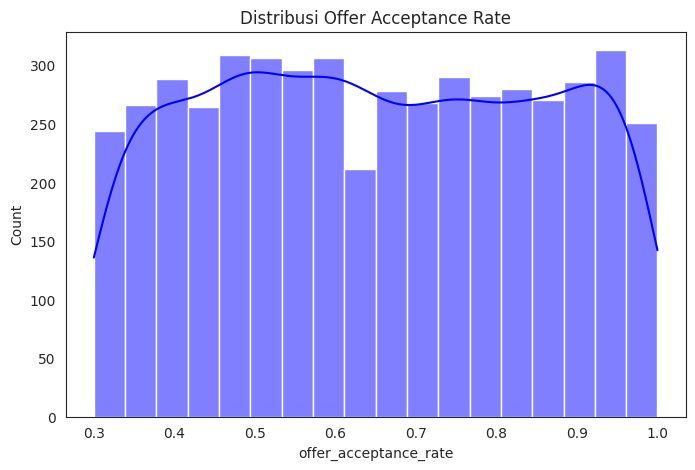

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['offer_acceptance_rate'], kde=True, color='blue')
plt.title('Distribusi Offer Acceptance Rate')
plt.show()

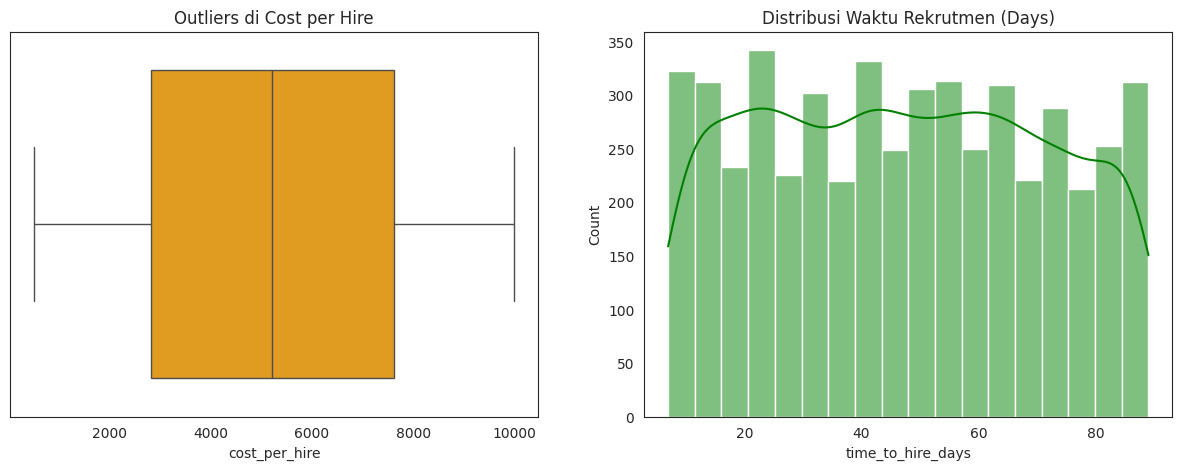

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(ax=axes[0], x=df['cost_per_hire'], color='orange')
axes[0].set_title('Outliers di Cost per Hire')

sns.histplot(ax=axes[1], x=df['time_to_hire_days'], kde=True, color='green')
axes[1].set_title('Distribusi Waktu Rekrutmen (Days)')

plt.show()

/tmp/ipython-input-584465279.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='department', data=df, palette='viridis')


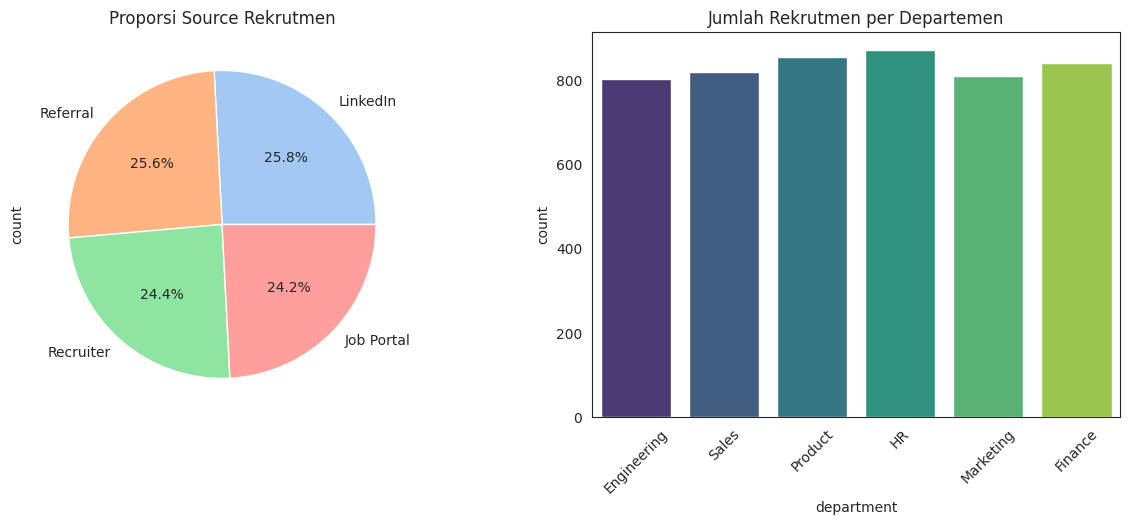

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df['source'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=sns.color_palette('pastel'))
axes[0].set_title('Proporsi Source Rekrutmen')

sns.countplot(ax=axes[1], x='department', data=df, palette='viridis')
axes[1].set_title('Jumlah Rekrutmen per Departemen')
plt.xticks(rotation=45)

plt.show()

- Semua department relatif seimbang jumlah datanya

- Tidak ada department dominan ekstrem

Insight: Perbedaan efisiensi antar department bukan disebabkan oleh ketimpangan jumlah data.

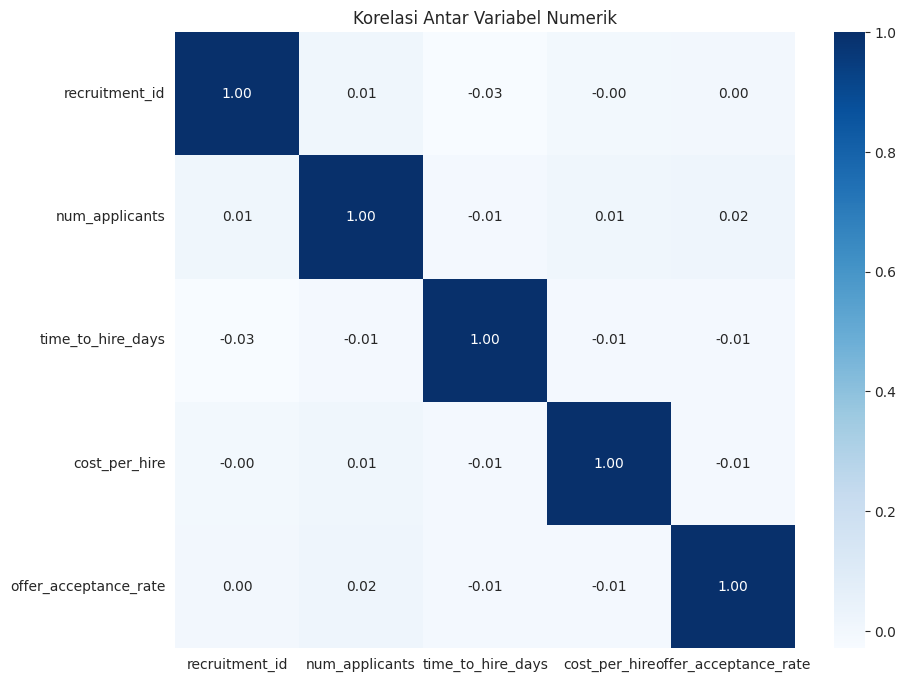

In [ ]:
plt.figure(figsize=(10, 8))
# Kita cuma ambil kolom numerik aja
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

- Number of Applicants vs Time to Hire dilihat bahwa banyaknya pelamar tidak otomatis mempercepat proses rekrutmen

- Cost per Hire vs Time to Hire, korelasi mendekati nol menunjukkan bahwa pengeluaran biaya yang lebih besar tidak menjamin proses lebih cepat.
Efisiensi biaya dan kecepatan rekrutmen tidak berjalan searah.
Bisa jadi karena biaya tinggi digunakan untuk channel mahal tapi lambat atau proses internal tidak efisien walaupun budget besar

- Offer Acceptance Rate vs Time to Hire, Korelasi juga lemah, yang berarti tingkat penerimaan offer tidak menjelaskan durasi rekrutmen secara langsung dalam hubungan linear.

- Tidak ada korelasi linear kuat antar variabel numerik.

/tmp/ipython-input-789947226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source', y='offer_acceptance_rate', data=df, palette='Set2')


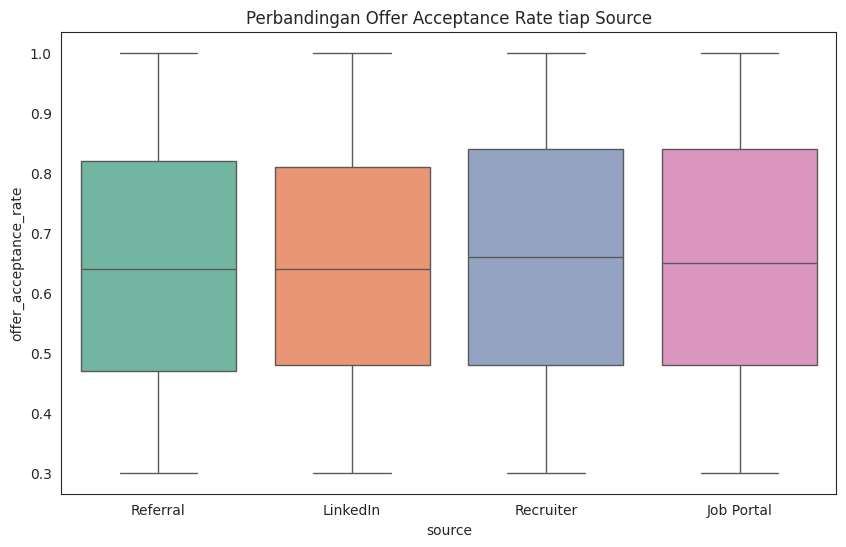

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='source', y='offer_acceptance_rate', data=df, palette='Set2')
plt.title('Perbandingan Offer Acceptance Rate tiap Source')
plt.show()

/tmp/ipython-input-913091467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='offer_acceptance_rate', data=df, estimator='mean', palette='magma')


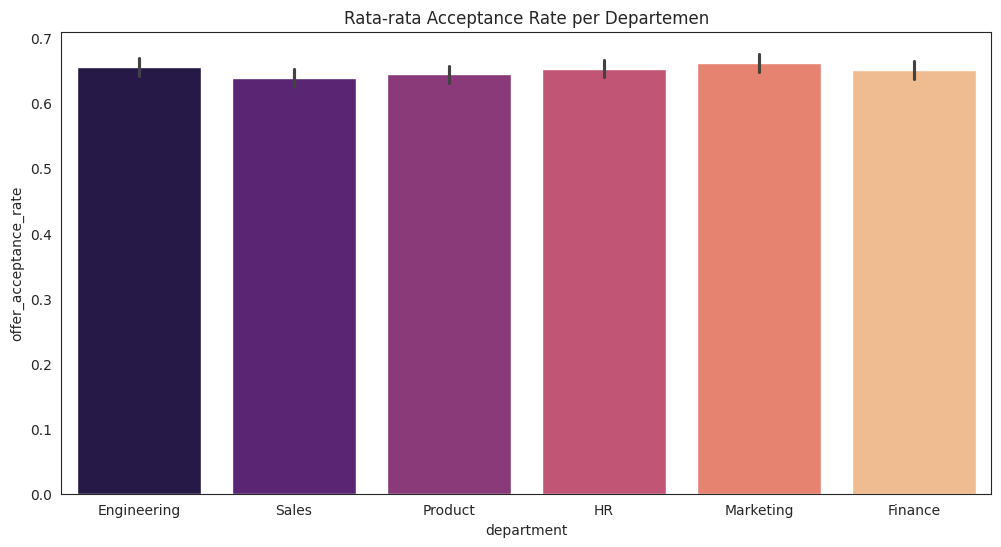

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='department', y='offer_acceptance_rate', data=df, estimator='mean', palette='magma')
plt.title('Rata-rata Acceptance Rate per Departemen')
plt.show()

- Perbedaan antar department kecil

- Error bar saling overlap

Insight: Tingkat keberhasilan rekrutmen relatif seragam antar department.

In [ ]:
# 1. Hitung rata-rata dan total cost per source
source_cost_analysis = df.groupby('source')['cost_per_hire'].agg(['mean', 'sum', 'count']).reset_index()

# 2. Rename kolom
source_cost_analysis.columns = ['Source', 'Avg_Cost', 'Total_Spend', 'Total_Hires']

# 3. Urutin dari yang paling hemat (Avg_Cost terendah)
source_cost_analysis = source_cost_analysis.sort_values(by='Avg_Cost')

print(source_cost_analysis)

       Source     Avg_Cost  Total_Spend  Total_Hires
1    LinkedIn  5148.312293   6646471.17         1291
3    Referral  5165.647522   6606863.18         1279
0  Job Portal  5248.674301   6345647.23         1209
2   Recruiter  5303.152826   6475149.60         1221


/tmp/ipython-input-1669027535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


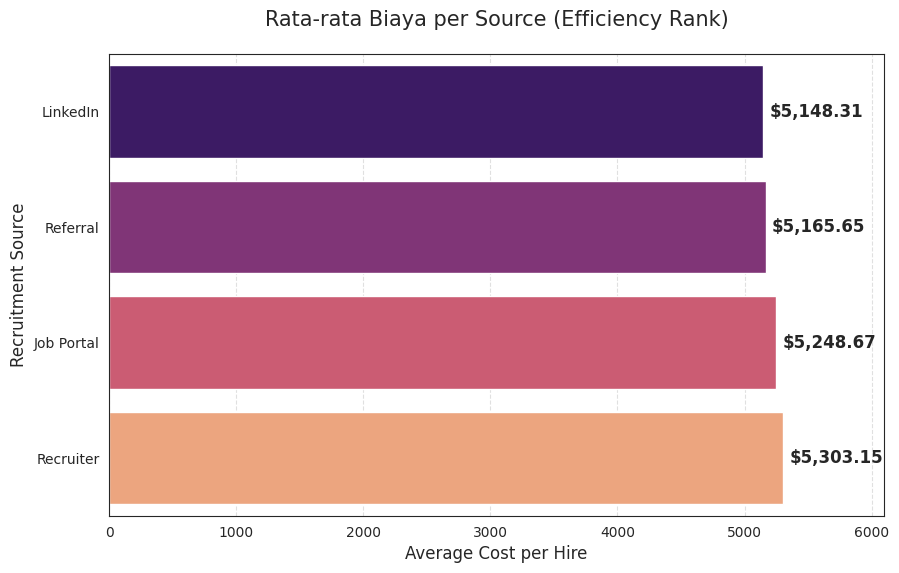

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=source_cost_analysis,
    x='Avg_Cost',
    y='Source',
    palette='magma'
)

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 50,
        p.get_y() + p.get_height()/2,
        f'${width:,.2f}',
        ha='left',
        va='center',
        fontsize=12,
        fontweight='bold'
    )


plt.title('Rata-rata Biaya per Source (Efficiency Rank)', fontsize=15, pad=20)
plt.xlabel('Average Cost per Hire', fontsize=12)
plt.ylabel('Recruitment Source', fontsize=12)
plt.xlim(0, source_cost_analysis['Avg_Cost'].max() * 1.15) # Kasih ruang buat label angka
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

- LinkedIn menang di dua sisi: dia punya Avg_Cost paling rendah ($5,148) dan Total_Hires paling banyak (1,291).

- Insight: LinkedIn adalah channel paling produktif dan paling murah secara rata-rata.

- Referral berada di posisi kedua dengan biaya yang hanya berbeda sedikit dengan LinkedIn (selisih  $17).
Insight:  Karena biayanya murah dan hasilnya banyak (1,279 hires), program referral bisa menjadi opsi yang baik

- Recruiter memiliki nilai Avg_Cost tertinggi ($5,303), tetapi jumlah orang yang didapet (1,221) lebih dikit dibanding LinkedIn dan Referral.

- Job Portal menempati total hires paling rendah (1,209).
Meskipun biayanya di tengah-tengah, efektivitasnya paling rendah dalam nyumbang kuantitas karyawan

In [ ]:
# 1. Hitung rata-rata dan total time to hire per source
source_time_analysis = (
    df.groupby('source')['time_to_hire_days']
      .agg(['mean', 'sum', 'count'])
      .reset_index()
)

# 2. Rename kolom
source_time_analysis.columns = [
    'Source',
    'Avg_Time_to_Hire',
    'Total_Time',
    'Total_Hires'
]

# 3. Urutin dari yang paling cepat (Avg_Time_to_Hire terendah)
source_time_analysis = source_time_analysis.sort_values(
    by='Avg_Time_to_Hire'
)

print(source_time_analysis)


       Source  Avg_Time_to_Hire  Total_Time  Total_Hires
0  Job Portal         46.512821       56234         1209
1    LinkedIn         46.993803       60669         1291
2   Recruiter         47.407043       57884         1221
3    Referral         47.826427       61170         1279


In [ ]:
# 1. Rata-rata time to hire per source dan department
source_dept_time = (
    df.groupby(['source', 'department'])['time_to_hire_days']
      .mean()
      .reset_index()
)

# 2. Rename kolom biar rapi
source_dept_time.columns = [
    'Source',
    'Department',
    'Avg_Time_to_Hire'
]

# 3. Urutin dari yang paling cepat
source_dept_time = source_dept_time.sort_values(
    by='Avg_Time_to_Hire'
)

print(source_dept_time)

        Source   Department  Avg_Time_to_Hire
2   Job Portal           HR         44.523560
16   Recruiter      Product         44.723618
8     LinkedIn           HR         45.236842
6     LinkedIn  Engineering         45.358209
5   Job Portal        Sales         45.951111
22    Referral      Product         46.237864
20    Referral           HR         46.556561
14   Recruiter           HR         46.614719
9     LinkedIn    Marketing         46.726368
4   Job Portal      Product         46.834862
13   Recruiter      Finance         46.887805
10    LinkedIn      Product         47.069264
0   Job Portal  Engineering         47.112245
3   Job Portal    Marketing         47.331551
1   Job Portal      Finance         47.375000
11    LinkedIn        Sales         47.658416
23    Referral        Sales         47.753623
15   Recruiter    Marketing         48.016484
17   Recruiter        Sales         48.080645
19    Referral      Finance         48.569444
18    Referral  Engineering       

- Job Portal–HR menjadi kombinasi tercepat, menunjukkan channel ini paling efisien untuk kebutuhan hiring administratif dan general role.

- Recruiter paling efektif di Product, namun justru paling lambat di Engineering, menandakan peran recruiter sangat tergantung kompleksitas skill yang dicari.

- LinkedIn relatif konsisten di HR dan Engineering, tetapi performanya menurun di Finance, sehingga lebih cocok untuk talent dengan exposure profesional yang kuat.

- Referral cenderung lebih lambat di hampir semua department, meskipun berpotensi menghasilkan kandidat berkualitas, proses seleksinya membutuhkan waktu lebih panjang.

- Tidak ada satu source yang unggul di semua department, sehingga strategi rekrutmen perlu disesuaikan secara spesifik berdasarkan fungsi dan kebutuhan skill.

In [ ]:
# 1. Agregasi time, cost, dan acceptance rate per source & department
source_dept_full_analysis = (
    df.groupby(['source', 'department'])
      .agg(
          Avg_Time_to_Hire=('time_to_hire_days', 'mean'),
          Avg_Cost_per_Hire=('cost_per_hire', 'mean'),
          Avg_Acceptance_Rate=('offer_acceptance_rate', 'mean'),
          Total_Hires=('recruitment_id', 'count')
      )
      .reset_index()
)

# 2. Urutkan: cepat, murah, acceptance tinggi
source_dept_full_analysis = source_dept_full_analysis.sort_values(
    by=[
        'Avg_Time_to_Hire',
        'Avg_Cost_per_Hire',
        'Avg_Acceptance_Rate'
    ],
    ascending=[True, True, False]
)

print(source_dept_full_analysis)

        source   department  Avg_Time_to_Hire  Avg_Cost_per_Hire  \
2   Job Portal           HR         44.523560        5313.525131   
16   Recruiter      Product         44.723618        5288.545879   
8     LinkedIn           HR         45.236842        5144.906272   
6     LinkedIn  Engineering         45.358209        5171.163731   
5   Job Portal        Sales         45.951111        4860.330578   
22    Referral      Product         46.237864        5143.563398   
20    Referral           HR         46.556561        5000.990136   
14   Recruiter           HR         46.614719        5362.968658   
9     LinkedIn    Marketing         46.726368        5117.084428   
4   Job Portal      Product         46.834862        5441.932523   
13   Recruiter      Finance         46.887805        5044.170098   
10    LinkedIn      Product         47.069264        5287.700693   
0   Job Portal  Engineering         47.112245        5452.093214   
3   Job Portal    Marketing         47.331551   

- Job Portal menghasilkan time-to-hire tercepat pada department HR (44.52 hari), sementara Recruiter pada department Product memiliki waktu rekrutmen yang hampir sama cepatnya (44.72 hari). Namun, source yang efektif pada HR tidak menunjukkan performa serupa pada Engineering maupun Finance.
Kebutuhan dan tingkat spesialisasi tiap department berbeda, efektivitas hiring source bersifat kontekstual terhadap department dan tidak dapat diseragamkan.

- Rata-rata time-to-hire pada seluruh kombinasi source dan department berada pada rentang 44 hingga 50 hari, dengan selisih sekitar enam hari antara kombinasi tercepat dan terlama.Variasi time-to-hire antar source dan department relatif terbatas, namun tetap memiliki implikasi operasional yang penting dalam skala rekrutmen yang besar.

- Referral pada department Engineering memiliki biaya rata-rata yang relatif rendah meskipun time-to-hire lebih lama, sementara Recruiter pada department Engineering menunjukkan biaya tertinggi dengan waktu rekrutmen terlama. Struktur biaya rekrutmen lebih dipengaruhi oleh mekanisme channel rekrutmen dibandingkan durasi proses hiring itu sendiri, sehingga waktu yang lebih lama tidak selalu menghasilkan biaya yang lebih tinggi.

- Nilai rata-rata acceptance rate pada seluruh kombinasi source dan department berada pada kisaran 0.63 hingga 0.67 tanpa perbedaan yang mencolok. Acceptance rate berperan sebagai indikator kualitas baseline dan bukan faktor utama pembeda efisiensi antar hiring source.

- Kombinasi seperti Job Portal–HR dan LinkedIn–Engineering menunjukkan time-to-hire yang relatif cepat, biaya yang masih moderat, serta acceptance rate yang stabil.

- Recruiter pada department Engineering memiliki time-to-hire dan cost-per-hire tertinggi tanpa diiringi acceptance rate yang lebih tinggi dibandingkan kombinasi lainnya.

- Distribusi data yang merata mengurangi risiko bias akibat ukuran sampel yang kecil dan meningkatkan keandalan kesimpulan yang dihasilkan dari analisis ini memiliki tingkat reliabilitas yang baik karena didukung oleh volume data yang relatif seimbang.



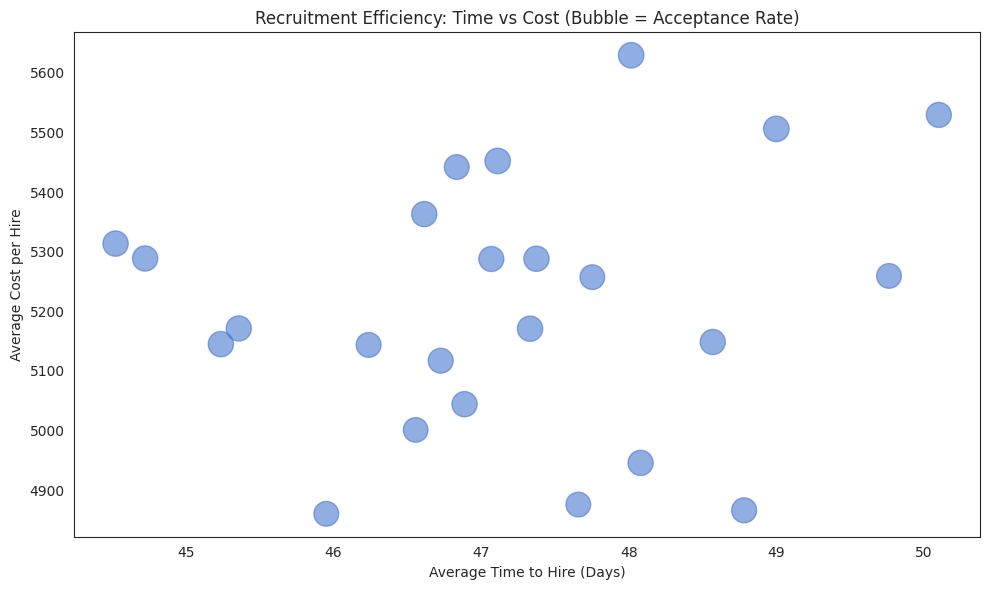

In [ ]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    source_dept_full_analysis['Avg_Time_to_Hire'],
    source_dept_full_analysis['Avg_Cost_per_Hire'],
    s=source_dept_full_analysis['Avg_Acceptance_Rate'] * 500,
    alpha=0.6
)

plt.xlabel("Average Time to Hire (Days)")
plt.ylabel("Average Cost per Hire")
plt.title("Recruitment Efficiency: Time vs Cost (Bubble = Acceptance Rate)")

plt.tight_layout()
plt.show()


- Acceptance rate relatif stabil di berbagai tingkat waktu dan biaya, menunjukkan bahwa kualitas keputusan kandidat tidak terlalu sensitif terhadap lamanya proses atau besarnya biaya.

- Efisiensi rekrutmen paling optimal berada pada kombinasi dengan time-to-hire rendah dan cost-per-hire moderat, bukan sekadar acceptance rate tinggi.

- Beberapa kombinasi menunjukkan inefisiensi ganda (lama dan mahal) tanpa kompensasi acceptance rate yang signifikan.

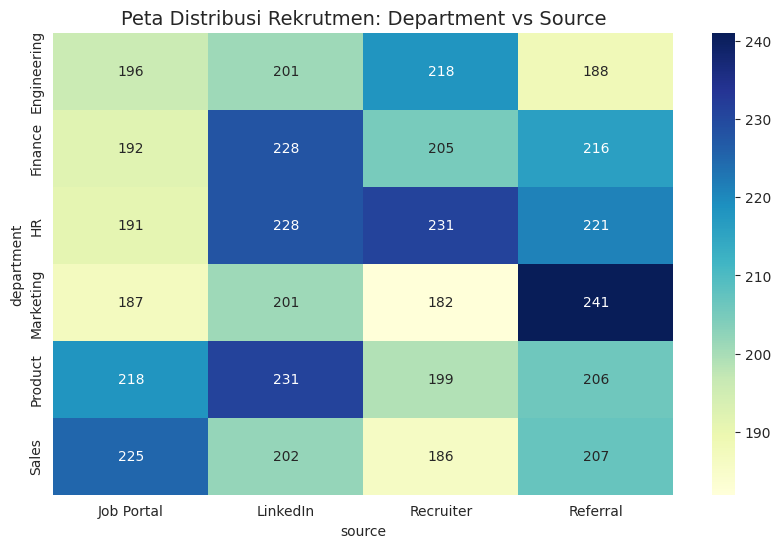

In [ ]:
#Department mana yang paling sering pake source apa? Ini penting buat ngasi saran alokasi budget.
pivot_dept_source = pd.crosstab(df['department'], df['source'])
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_dept_source, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Peta Distribusi Rekrutmen: Department vs Source', fontsize=14)
plt.show()

- Tidak ada source yang dominan, efektivitas hiring source bersifat kontekstual terhadap departemen.
Menggunakan satu hiring channel untuk semua departemen berpotensi tidak efisien karena distribusi berbeda setiap dapartment
- Linkend merupakan source yang paling stabil diantara lainnya

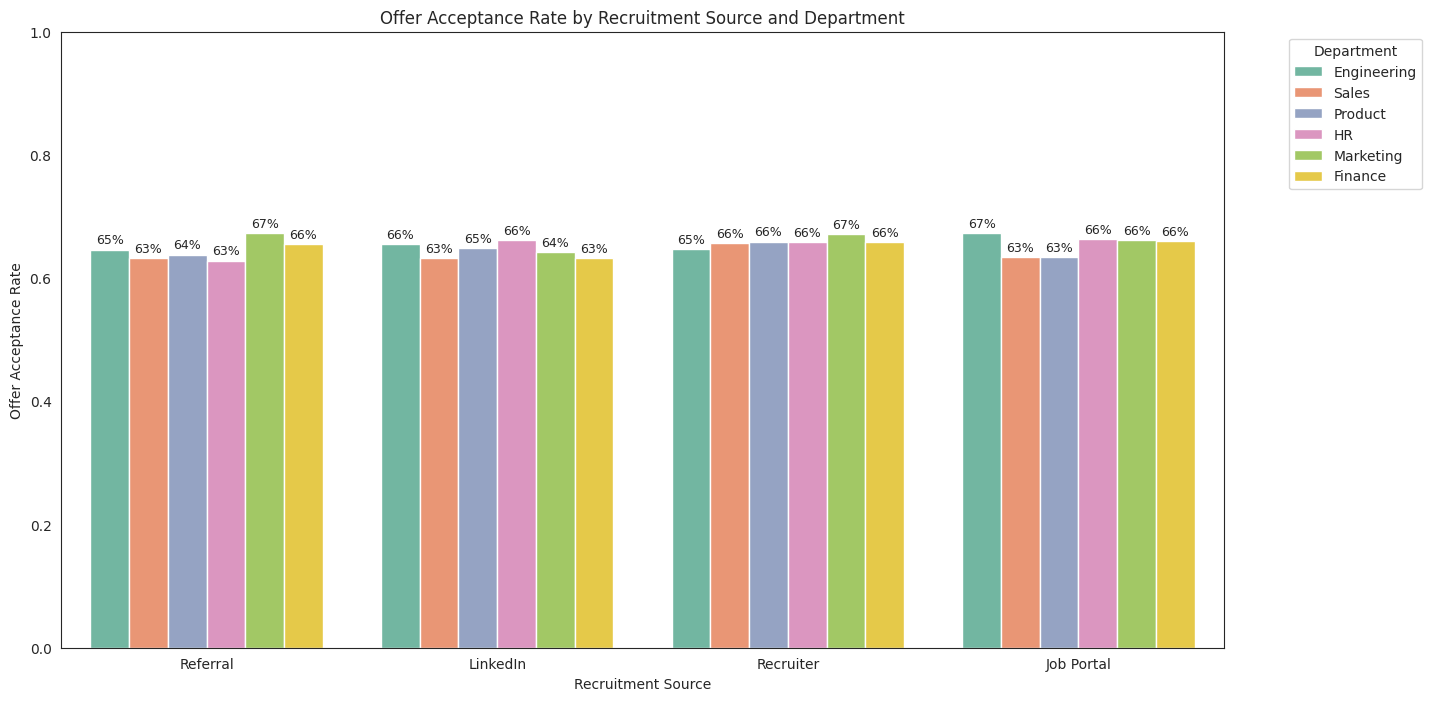

In [ ]:
plt.figure(figsize=(15, 8))

ax = sns.barplot(
    x='source',
    y='offer_acceptance_rate',
    hue='department',
    data=df,
    palette='Set2',
    errorbar=None
)

plt.title('Offer Acceptance Rate by Recruitment Source and Department')
plt.xlabel('Recruitment Source')
plt.ylabel('Offer Acceptance Rate')
plt.ylim(0, 1)

# Angka di atas bar
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v*100:.0f}%' for v in container.datavalues],
        fontsize=9,
        padding=2
    )

plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


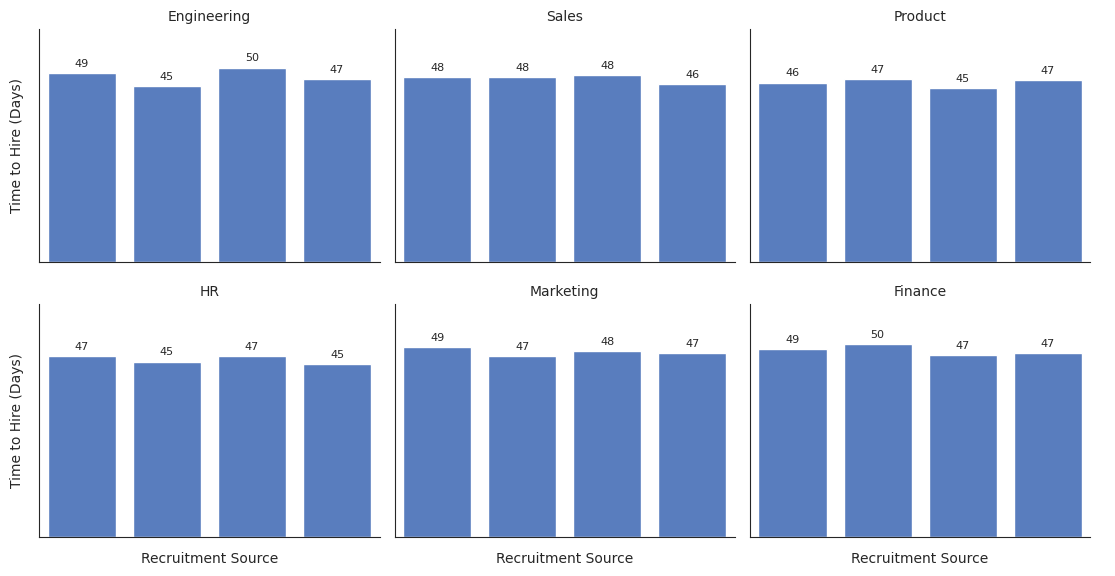

In [ ]:
sns.set_style("white")

g = sns.catplot(
    data=df,
    x='source',
    y='time_to_hire_days',
    col='department',
    kind='bar',
    col_wrap=3,
    height=3,
    aspect=1.25,
    errorbar=None
)

g.set_titles('{col_name}', size=10)
g.set_axis_labels('Recruitment Source', 'Time to Hire (Days)')
g.set_xticklabels(rotation=30, ha='right', size=8)
g.set_yticklabels(size=8)

for ax in g.axes.flatten():
    ax.grid(False)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', fontsize=8, padding=3)

plt.show()


- Hampir di semua departemen, Referral punya acceptance rate tertinggi (~67–68%) Ini menunjukkan kandidat dari referral lebih siap, lebih cocok budaya, dan ekspektasinya lebih realistis.

- Perbedaan antar departemen relatif kecil dan tidak ada gap ekstrem antar departemen. Ini menandakan kebijakan kompensasi & hiring antar departemen cukup konsisten

/tmp/ipython-input-776730395.py:2: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='source', y='time_to_hire_days', hue='department', data=df, join=False)


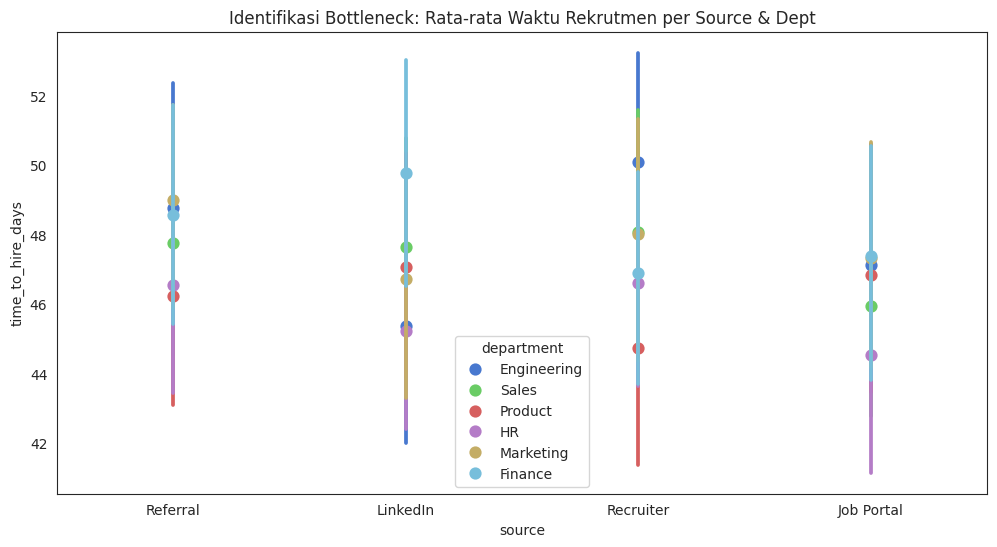

In [ ]:
plt.figure(figsize=(12,6))
sns.pointplot(x='source', y='time_to_hire_days', hue='department', data=df, join=False)
plt.title('Identifikasi Bottleneck: Rata-rata Waktu Rekrutmen per Source & Dept')
plt.show()

- Time to hire dari referral cenderung lebih singkat (±45–47 hari).
Logis karena: Kandidat sudah “pre-screened”, lebih cepat scheduling & decision

- LinkedIn & Job Portal cenderung lebih lama
Bisa mencapai 48–50 hari, terutama di: Engineering, Marketing
Ini menunjukkan proses screening lebih berat karena volume kandidat besar.

- Hampir semua source di Engineering & Product lebih lama dibanding HR/Finance.

Menandakan: Skill lebih spesifik, Interview stage lebih banyak, Talent supply lebih terbatas

In [ ]:
df['oar_bin'] = pd.cut(
    df['offer_acceptance_rate'],
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Low OAR', 'Medium OAR', 'High OAR']
)


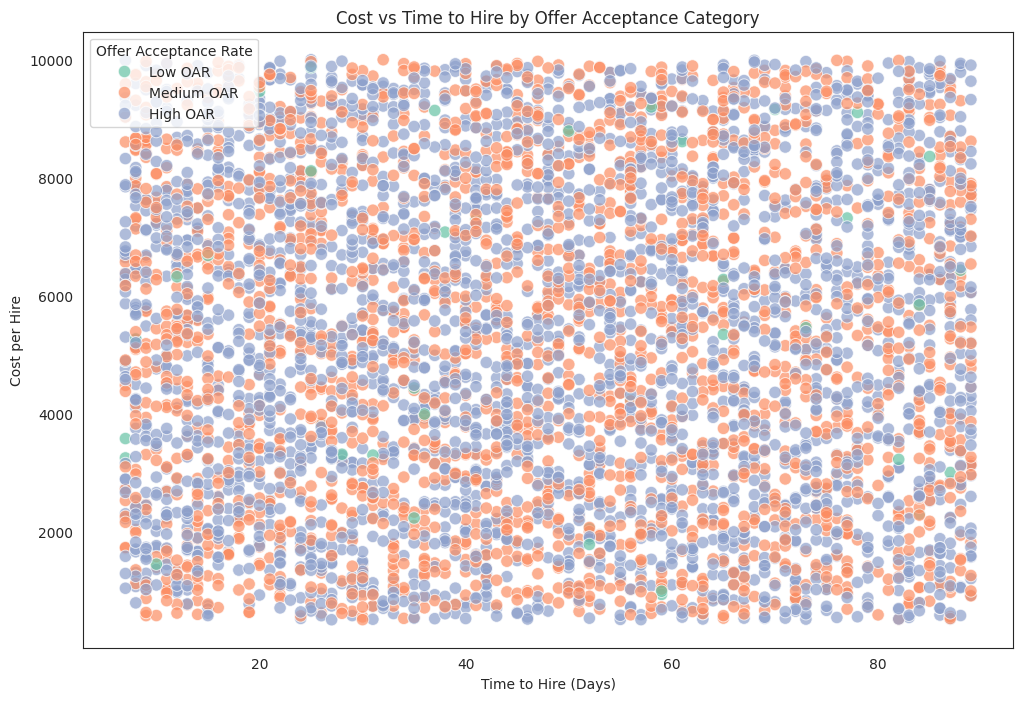

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='time_to_hire_days',
    y='cost_per_hire',
    hue='oar_bin',
    palette='Set2',
    alpha=0.7,
    s=80
)
plt.title('Cost vs Time to Hire by Offer Acceptance Category')
plt.xlabel('Time to Hire (Days)')
plt.ylabel('Cost per Hire')
plt.legend(title='Offer Acceptance Rate')
plt.show()


Tidak ada korelasi kuat antara time to hire dan cost dan Titik-titik tersebar acak, tidak membentuk pola naik/turun yang jelas.

Artinya: Hiring yang lebih lama tidak selalu lebih mahal, Hiring cepat juga bisa tetap mahal

In [ ]:
df_model = df.drop(columns=['recruitment_id'])

In [ ]:
job_source_metrics = (
    df_model
    .groupby(['job_title', 'source'])
    .agg(
        num_applicants=('num_applicants', 'sum'),
        OAR=('offer_acceptance_rate', 'mean')
    )
    .reset_index()
)
job_source_metrics

,job_title,source,num_applicants,OAR
0,Account Executive,Job Portal,8874,0.645574
1,Account Executive,LinkedIn,7515,0.633077
2,Account Executive,Recruiter,5699,0.700000
3,Account Executive,Referral,8436,0.609412
4,Accountant,Job Portal,6816,0.679000
...,...,...,...,...
91,UI Designer,Referral,6175,0.673182
92,UX Designer,Job Portal,9860,0.646491
93,UX Designer,LinkedIn,11429,0.652817
94,UX Designer,Recruiter,7232,0.618333


In [ ]:
best_source_per_job = (
    job_source_metrics
    .sort_values(['job_title', 'OAR'], ascending=[True, False])
    .groupby('job_title')
    .head(1)
)
best_source_per_job

,job_title,source,num_applicants,OAR
2,Account Executive,Recruiter,5699,0.700000
4,Accountant,Job Portal,6816,0.679000
8,Backend Developer,Job Portal,7369,0.682444
15,Business Development Manager,Referral,9288,0.658421
17,Content Strategist,LinkedIn,8288,0.707347
22,Data Engineer,Recruiter,9465,0.672759
24,DevOps Engineer,Job Portal,7233,0.653333
29,Finance Manager,LinkedIn,8285,0.662353
32,Financial Analyst,Job Portal,7854,0.676200
38,HR Coordinator,Recruiter,8956,0.689167


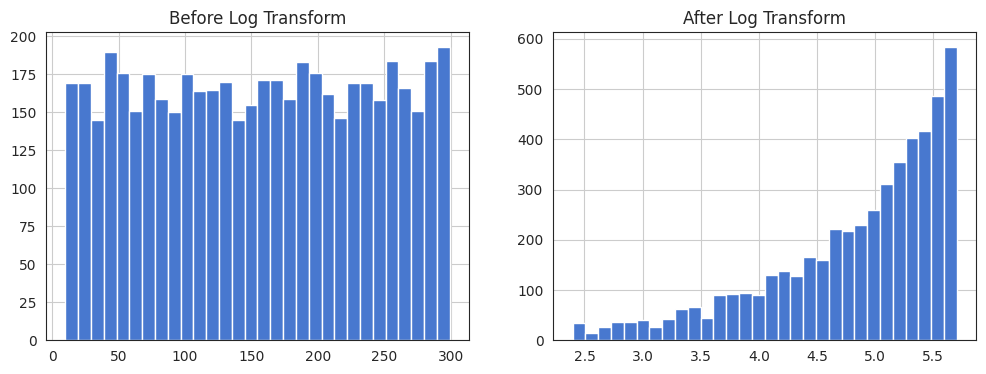

In [ ]:
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_model['num_applicants'].hist(bins=30, ax=axes[0])
axes[0].set_title('Before Log Transform')

np.log1p(df_model['num_applicants']).hist(bins=30, ax=axes[1])
axes[1].set_title('After Log Transform')

plt.show()


In [ ]:
df_model['log_cost_per_hire'] = np.log1p(df_model['cost_per_hire'])
df_model['log_time_to_hire_days'] = np.log1p(df_model['time_to_hire_days'])


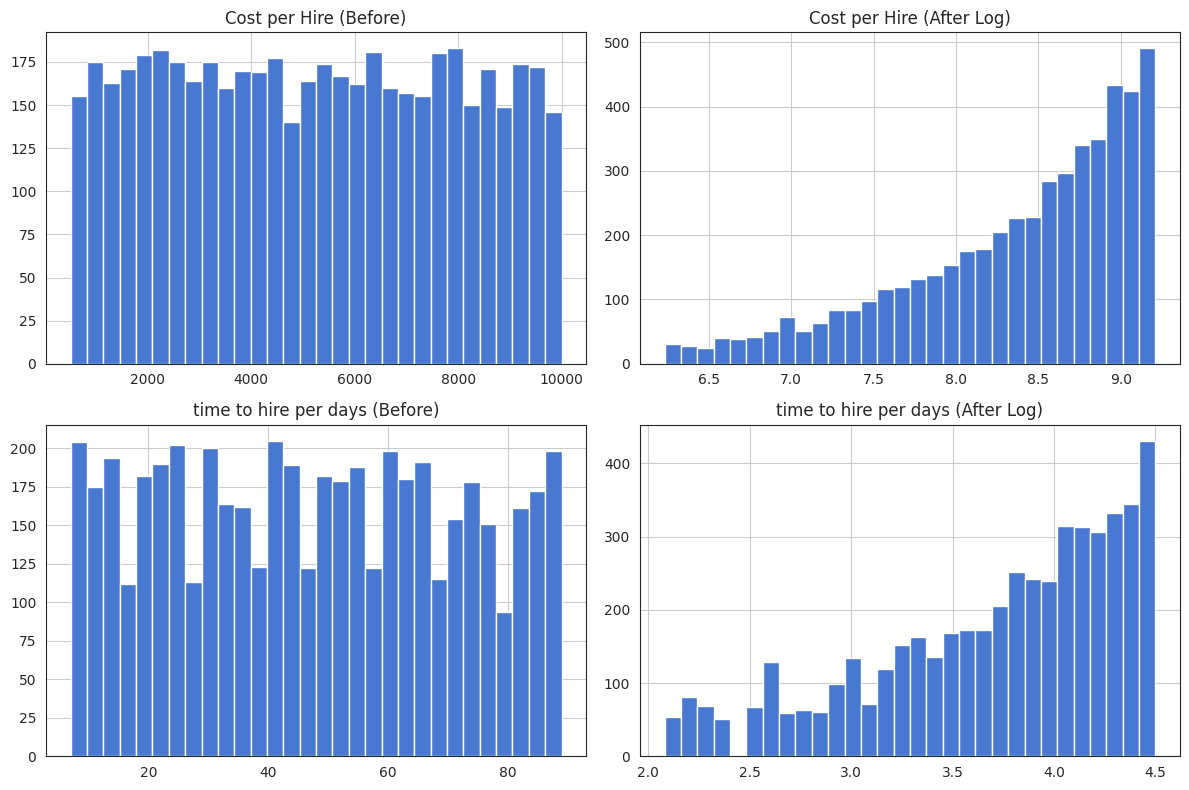

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

df_model['cost_per_hire'].hist(bins=30, ax=axes[0,0])
axes[0,0].set_title('Cost per Hire (Before)')

df_model['log_cost_per_hire'].hist(bins=30, ax=axes[0,1])
axes[0,1].set_title('Cost per Hire (After Log)')

df_model['time_to_hire_days'].hist(bins=30, ax=axes[1,0])
axes[1,0].set_title('time to hire per days (Before)')

df_model['log_time_to_hire_days'].hist(bins=30, ax=axes[1,1])
axes[1,1].set_title('time to hire per days (After Log)')

plt.tight_layout()
plt.show()


### Transformasi log telah dievaluasi pada fitur numerik. Berdasarkan analisis distribusi dan tingkat kemencengan (skewness), transformasi log tidak diterapkan karena fitur tersebut tidak menunjukkan skewness yang signifikan.

In [ ]:
df_model = df_model.drop(
    columns=['log_cost_per_hire', 'log_time_to_hire_days']
)


In [ ]:
num_cols = ['num_applicants', 'time_to_hire_days', 'cost_per_hire',
            'cost_per_applicant', 'hiring_velocity', 'cost_time_index']

In [ ]:
df_model.describe()

,num_applicants,time_to_hire_days,cost_per_hire,offer_acceptance_rate
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,155.621000,47.191400,5214.826236,0.650832
std,84.164264,23.864934,2730.999185,0.202052
min,10.000000,7.000000,507.160000,0.300000
25%,83.000000,26.000000,2820.597500,0.480000
50%,157.000000,47.000000,5218.290000,0.650000
75%,229.000000,67.000000,7611.412500,0.830000
max,299.000000,89.000000,9998.910000,1.000000


In [ ]:
df_model = df_model.drop(columns=['oar_bin'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_eff = MinMaxScaler()

df[['oar_norm', 'time_norm', 'cost_norm']] = scaler_eff.fit_transform(
    df[['offer_acceptance_rate',
            'time_to_hire_days',
            'cost_per_hire']]
)


In [ ]:
df['efficiency_score'] = (
    df['oar_norm']
    - df['time_norm']
    - df['cost_norm']
)


In [ ]:
df['efficiency_score'].describe()

,efficiency_score
count,5000.000000
mean,-0.484925
std,0.502148
min,-1.869323
25%,-0.845868
50%,-0.483464
75%,-0.131828
max,0.872385


In [ ]:
efficiency_agg = (
    df
    .groupby(['job_title', 'source'])['efficiency_score']
    .mean()
    .reset_index()
)


### Deep dive (job level)

In [ ]:
df_model = (
    df
    .groupby(["job_title", "source"])
    .agg(
        avg_time_to_hire=("time_to_hire_days", "mean"),
        avg_cost_per_hire=("cost_per_hire", "mean"),
        avg_OAR=("offer_acceptance_rate", "mean"),
        hiring_count=("job_title", "count")
    )
    .reset_index()
)
df_model.sort_values(
    ["job_title", "avg_OAR"],
    ascending=[True, False]
)
df_model

,job_title,source,avg_time_to_hire,avg_cost_per_hire,avg_OAR,hiring_count
0,Account Executive,Job Portal,44.672131,4777.670656,0.645574,61
1,Account Executive,LinkedIn,44.326923,4464.992500,0.633077,52
2,Account Executive,Recruiter,49.973684,5019.735263,0.700000,38
3,Account Executive,Referral,46.274510,5164.621569,0.609412,51
4,Accountant,Job Portal,43.020000,5221.758000,0.679000,50
...,...,...,...,...,...,...
91,UI Designer,Referral,50.590909,4984.738636,0.673182,44
92,UX Designer,Job Portal,49.473684,4766.016667,0.646491,57
93,UX Designer,LinkedIn,46.732394,5229.094930,0.652817,71
94,UX Designer,Recruiter,41.687500,5450.451042,0.618333,48


In [ ]:
df_model = df_model.merge(
    efficiency_agg,
    on=['job_title', 'source'],
    how='left'
)


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_model['efficiency_score_scaled'] = scaler.fit_transform(
    df_model[['efficiency_score']]
)


In [ ]:
df_model= df_model[df_model['job_title'] != 'DevOps Engineer'].copy()

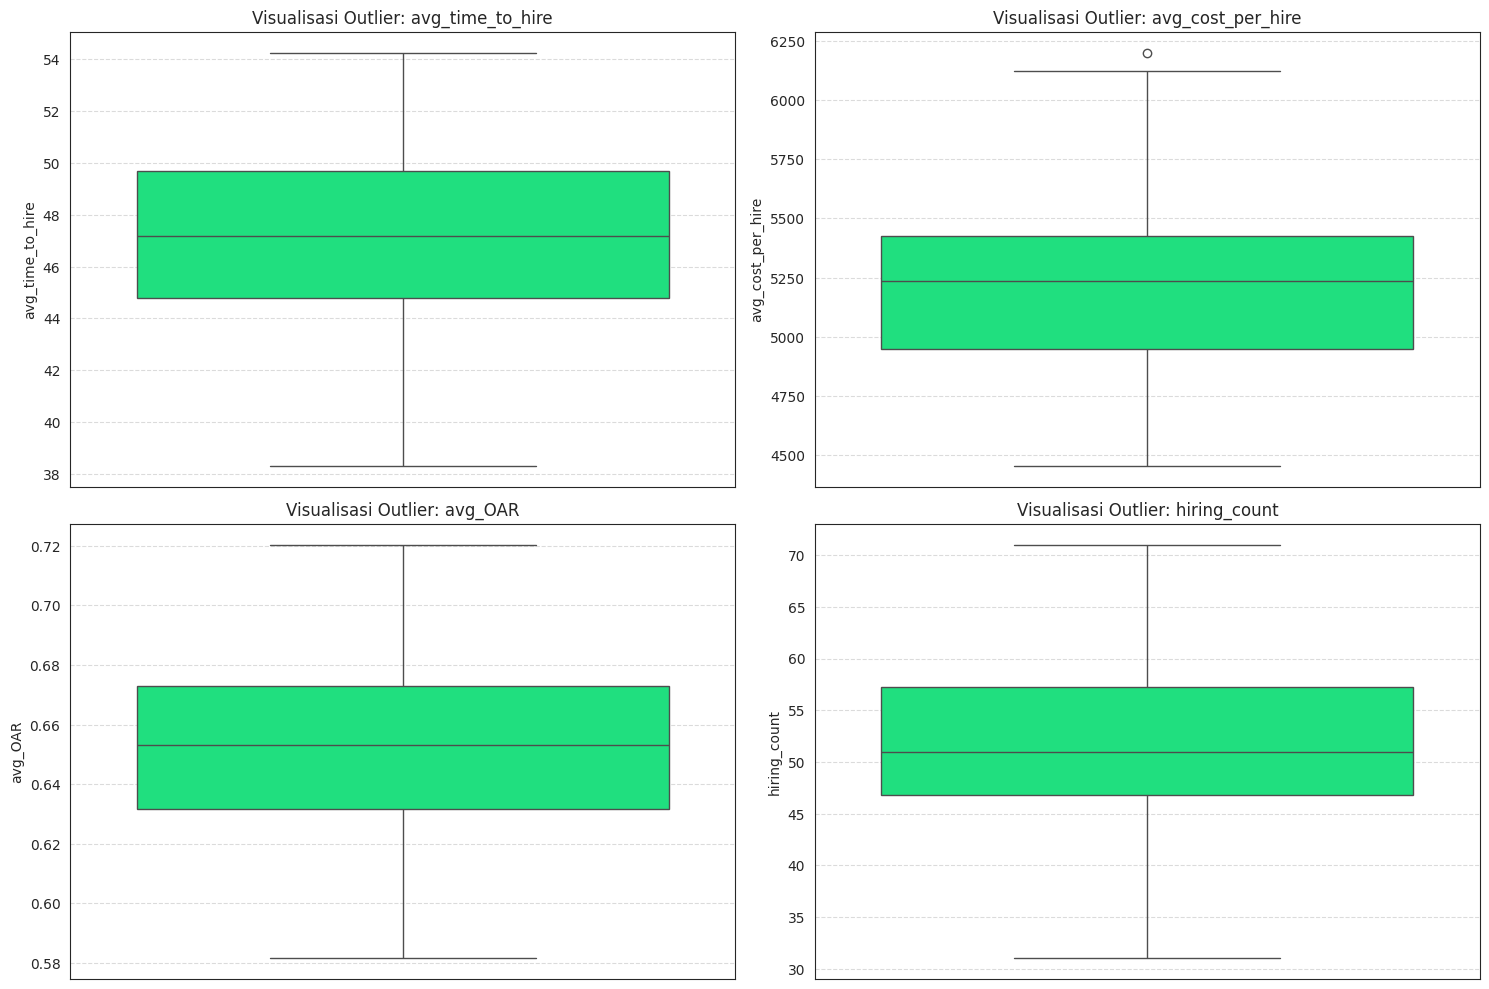

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Bikin list nama kolom (ini cuma variabel list, bukan manggil dataframe)
features_list = ['avg_time_to_hire', 'avg_cost_per_hire', 'avg_OAR', 'hiring_count']

# 2. Setup visualisasi
plt.figure(figsize=(15, 10))

for i, col in enumerate(features_list, 1):
    plt.subplot(2, 2, i)
    # Panggil datanya di sini: df_model[col]
    sns.boxplot(y=df_model[col], color='springgreen')
    plt.title(f'Visualisasi Outlier: {col}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- Avg Time to Hire
Distribusi relatif rapat
Tidak banyak outlier ekstrem
Insight : Waktu rekrutmen relatif konsisten antar proses, tidak ada hiring yang sangat menyimpang ekstrem.

- Avg Cost per Hire
Ada beberapa outlier di sisi atas
Distribusi lebih lebar dibanding time to hire
Insight : Cost per hire memiliki variasi tinggi dan dipengaruhi kasus tertentu (special role / channel mahal).

- Avg OAR
Nilai OAR terkonsentrasi di rentang tengah
Hampir tidak ada outlier ekstrem
Insight : Tingkat penerimaan offer relatif stabil dan tidak didominasi kasus ekstrem.

- Tidak ada outlier ekstrem
Tidak ada titik di luar whisker
Artinya secara statistik (IQR rule), hiring_count tidak punya outlier

In [ ]:
# Cari job yang biayanya di atas batas atas (Outlier)
Q1 = df_model['avg_cost_per_hire'].quantile(0.25)
Q3 = df_model['avg_cost_per_hire'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outlier_data = df_model[df_model['avg_cost_per_hire'] > upper_bound]
print(outlier_data[['job_title', 'avg_cost_per_hire']].sort_values(by='avg_cost_per_hire', ascending=False))

             job_title  avg_cost_per_hire
18  Content Strategist           6200.619


In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# 1. Inisialisasi RobustScaler
# Tujuan: Menangani skewness akibat outlier pada fitur 'avg_cost_per_hire'.
# RobustScaler menggunakan statistik median dan Interquartile Range (IQR),
# sehingga estimasi parameter tidak bias terhadap nilai ekstrem (pencilan).
scaler = RobustScaler()

# 2. Definisikan fitur numerik untuk penskalaan
target_features = ["avg_time_to_hire", "avg_cost_per_hire", "avg_OAR"]

# 3. Transformasi Data
# Hasil transformasi disimpan dalam array untuk diintegrasikan kembali ke dataframe
scaled_array = scaler.fit_transform(df_model[target_features])

# 4. Konstruksi DataFrame Hasil Scaling
# Penamaan kolom menggunakan suffix '_scaled' untuk membedakan distribusi
# original dengan distribusi hasil transformasi.
df_scaled = pd.DataFrame(
    scaled_array,
    columns=[f"{col}_scaled" for col in target_features]
)

# 5. Integrasi Data (Concatenation)
# Menggunakan reset_index untuk menjamin integritas aligment index saat penggabungan
df_model = pd.concat([df_model.reset_index(drop=True), df_scaled], axis=1)

# Verifikasi transformasi distribusi
print("Robust Scaling Completed.")
print(df_model[["avg_cost_per_hire", "avg_cost_per_hire_scaled"]].describe())


Robust Scaling Completed.
       avg_cost_per_hire  avg_cost_per_hire_scaled
count          92.000000              9.200000e+01
mean         5204.813439             -6.386893e-02
std           350.972881              7.335427e-01
min          4454.276809             -1.632510e+00
25%          4949.485098             -5.975120e-01
50%          5235.372346             -9.506285e-16
75%          5427.947907              4.024880e-01
max          6200.619000              2.017391e+00


- Distribusi cost per hire menunjukkan skew ke kanan, sehingga penggunaan RobustScaler lebih tepat dibanding StandardScaler atau MinMaxScaler.

- Nilai maksimum cost tetap muncul cukup jauh setelah scaling, menandakan adanya hiring channel atau kondisi tertentu yang jauh lebih mahal dari mayoritas kasus.

- Meskipun terdapat nilai cost tinggi, sebagian besar observasi terkonsentrasi di sekitar median, menunjukkan struktur data yang tidak linear dan tidak homogen.

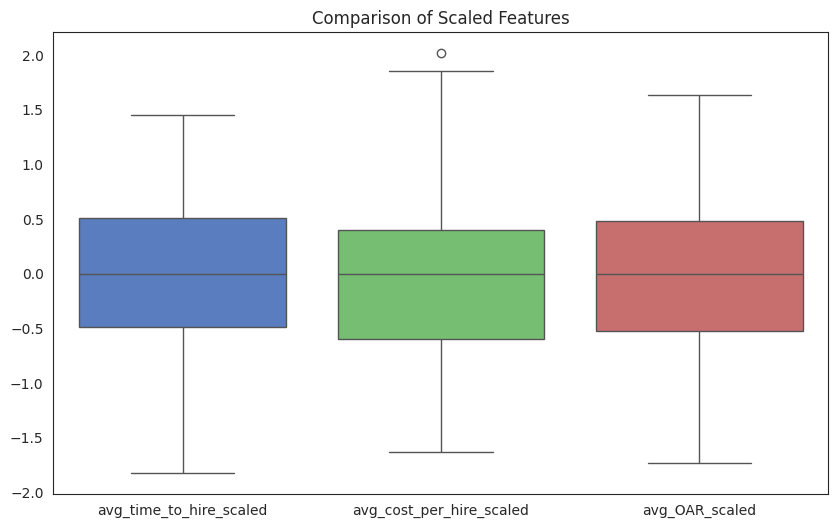

In [ ]:
plt.figure(figsize=(10, 6))
# Plot semua fitur scaled dalam satu frame
sns.boxplot(data=df_model[['avg_time_to_hire_scaled', 'avg_cost_per_hire_scaled', 'avg_OAR_scaled']])
plt.title('Comparison of Scaled Features')
plt.show()

- Keempat fitur punya: Rentang skala mirip dan Median dekat nol
- avg_cost_per_hire_scaled punya spread paling lebar
- avg_time_to_hire_scaled & avg_OAR_scaled lebih rapat

insight :
- Tidak ada satu fitur yang secara ekstrem mendominasi skala
- Data siap digunakan untuk clustering tanpa bias skala
- Variasi terbesar ada di cost, sehingga cost berpotensi jadi pembeda cluster

In [ ]:
df_model

,job_title,source,avg_time_to_hire,avg_cost_per_hire,avg_OAR,hiring_count,efficiency_score,efficiency_score_scaled,avg_time_to_hire_scaled,avg_cost_per_hire_scaled,avg_OAR_scaled
0,Account Executive,Job Portal,44.672131,4777.670656,0.645574,61,-0.415658,0.654226,-0.516733,-0.956609,-0.180869
1,Account Executive,LinkedIn,44.326923,4464.992500,0.633077,52,-0.396358,0.859345,-0.587495,-1.610114,-0.483420
2,Account Executive,Recruiter,49.973684,5019.735263,0.700000,38,-0.428062,0.522392,0.569998,-0.450687,1.136798
3,Account Executive,Referral,46.274510,5164.621569,0.609412,51,-0.527626,-0.535809,-0.188272,-0.147871,-1.056357
4,Accountant,Job Portal,43.020000,5221.758000,0.679000,50,-0.394545,0.878622,-0.855393,-0.028454,0.628385
...,...,...,...,...,...,...,...,...,...,...,...
87,UI Designer,Referral,50.590909,4984.738636,0.673182,44,-0.470213,0.074390,0.696519,-0.523831,0.487526
88,UX Designer,Job Portal,49.473684,4766.016667,0.646491,57,-0.471675,0.058859,0.467506,-0.980966,-0.158658
89,UX Designer,LinkedIn,46.732394,5229.094930,0.652817,71,-0.477995,-0.008317,-0.094413,-0.013120,-0.005512
90,UX Designer,Recruiter,41.687500,5450.451042,0.618333,48,-0.489055,-0.125866,-1.128533,0.449520,-0.840365


Kesimpulan EDA

Berdasarkan keseluruhan Exploratory Data Analysis, efisiensi rekrutmen merupakan hasil dari kombinasi antara time to hire, cost per hire, dan offer acceptance rate, sehingga tidak dapat dievaluasi menggunakan satu metrik tunggal. Tidak ada satu recruitment source yang selalu paling efektif untuk semua jenis role, karena performanya sangat bergantung pada konteks posisi yang direkrut. Selain itu, durasi rekrutmen yang lebih lama tidak selalu berarti biaya yang lebih tinggi, sehingga strategi rekrutmen perlu disesuaikan secara spesifik berdasarkan kebutuhan masing-masing role.
Implikasi terhadap Modeling Methodology

Berdasarkan temuan tersebut, solusi yang dikembangkan tidak berfokus pada memprediksi hasil rekrutmen, melainkan pada membantu pengambilan keputusan. Pendekatan yang digunakan mengelompokkan dan membandingkan efektivitas recruitment source berdasarkan pola historis waktu, biaya, dan acceptance rate, sehingga HR dapat dengan mudah mengidentifikasi source yang paling efisien untuk setiap jenis role dan menyusun strategi rekrutmen yang lebih tepat sasaran.

In [ ]:
df_model.to_csv("dataset_final.csv", index=False)

## Data Preparation & Feature Engineering (Data Engineering Scope)

### Tahap ini berfokus pada penyiapan data agar siap digunakan untuk proses modeling.
